In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
from nilearn.datasets import fetch_abide_pcp
# Fetch the full data and update phenotypic data and cross_validation
abide_aal = fetch_abide_pcp(derivatives = ['rois_aal'], pipeline = 'cpac', quality_checked = True)
y_aal = abide_aal.phenotypic['DX_GROUP']
y_aal[y_aal == 2] = 0
atlas = 'AAL'

In [47]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score
scoring = {
    'accuracy':    make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

In [59]:
correlation = 'correlation'
partial = 'partial correlation'
tangent = 'tangent'

lr = "LR"
lsvm = "LSVM"
ksvm = "kSVM"
rf = "RF"
ab = "AB"

measure = [correlation, partial, tangent]

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_corr = LogisticRegression(C = 0.01)
lr_part = LogisticRegression(C = 1)
lr_tang = LogisticRegression(C = 1)

In [50]:
# Linear SVM
from sklearn.svm import SVC

lsvm_corr = SVC(kernel='linear',C = 0.01)
lsvm_part = SVC(kernel='linear',C = 0.1)
lsvm_tang = SVC(kernel='linear',C = 0.01)

In [51]:
# Kernel SVM

ksvm_corr = SVC(gamma = 'auto', C = 100)
ksvm_part = SVC(gamma = 'auto', C = 1000)
ksvm_tang = SVC(gamma = 'auto', C = 100)

In [52]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_corr = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_part = RandomForestClassifier(max_depth = 8, random_state = 0)
rf_tang = RandomForestClassifier(max_depth = 6, random_state = 0)

In [60]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier

ab_corr = AdaBoostClassifier(n_estimators = 100)
ab_part = AdaBoostClassifier(n_estimators = 100)
ab_tang = AdaBoostClassifier(n_estimators = 100)

In [61]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

=========================================================
# Logistic Regression
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [56]:
# Correlation
from crossvalidation import CrossValidation

[X_lr_corr, lr_corr_scores] = CrossValidation(lr_corr, correlation, y_aal, skf, abide_aal.rois_aal)
[X_lr_part, lr_part_scores] = CrossValidation(lr_part, partial,     y_aal, skf, abide_aal.rois_aal)
[X_lr_tang, lr_tang_scores] = CrossValidation(lr_tang, tangent,     y_aal, skf, abide_aal.rois_aal)


In [12]:
from scores import getScores
[lr_corr_acc, lr_corr_sen, lr_corr_spe] = getScores(lr_corr_scores)
[lr_part_acc, lr_part_sen, lr_part_spe] = getScores(lr_part_scores)
[lr_tant_acc, lr_tang_sen, lr_tang_spe] = getScores(lr_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

In [13]:
from roc import plotROC

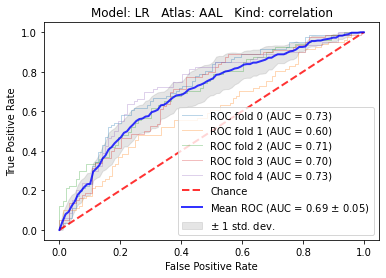

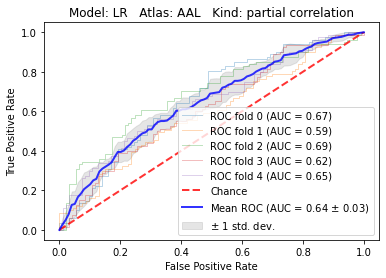

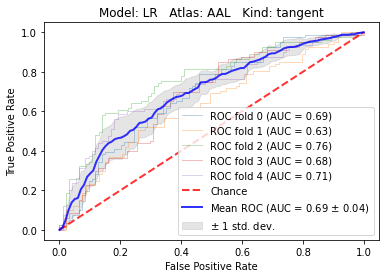

In [14]:
import matplotlib.pylab as pl

plotROC(lr_corr, X_lr_corr, y_aal, skf, atlas, correlation, lr)
plotROC(lr_part, X_lr_part, y_aal, skf, atlas, partial, lr)
plotROC(lr_tang, X_lr_tang, y_aal, skf, atlas, tangent, lr)

=========================================================
# Linear SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [15]:
# Correlation
from crossvalidation import CrossValidation

[X_lsvm_corr, lsvm_corr_scores] = CrossValidation(lsvm_corr, correlation, y_aal, skf, abide_aal.rois_aal)
[X_lsvm_part, lsvm_part_scores] = CrossValidation(lsvm_part, partial,     y_aal, skf, abide_aal.rois_aal)
[X_lsvm_tang, lsvm_tang_scores] = CrossValidation(lsvm_tang, tangent,     y_aal, skf, abide_aal.rois_aal)


In [16]:
from scores import getScores
[lsvm_corr_acc, lsvm_corr_sen, lsvm_corr_spe] = getScores(lsvm_corr_scores)
[lsvm_part_acc, lsvm_part_sen, lsvm_part_spe] = getScores(lsvm_part_scores)
[lsvm_tant_acc, lsvm_tang_sen, lsvm_tang_spe] = getScores(lsvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

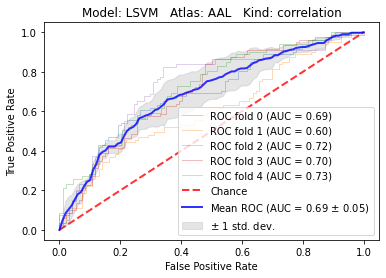

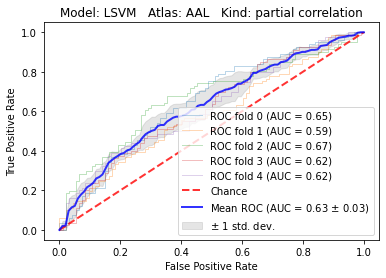

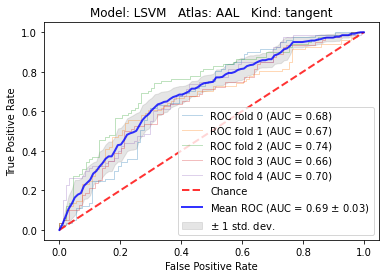

In [17]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(lsvm_corr, X_lsvm_corr, y_aal, skf, atlas, correlation, lsvm)
plotROC(lsvm_part, X_lsvm_part, y_aal, skf, atlas, partial, lsvm)
plotROC(lsvm_tang, X_lsvm_tang, y_aal, skf, atlas, tangent, lsvm)

=========================================================
# Kernal SVM
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [18]:
# Correlation
from crossvalidation import CrossValidation

[X_ksvm_corr, ksvm_corr_scores] = CrossValidation(ksvm_corr, correlation, y_aal, skf, abide_aal.rois_aal)
[X_ksvm_part, ksvm_part_scores] = CrossValidation(ksvm_part, partial,     y_aal, skf, abide_aal.rois_aal)
[X_ksvm_tang, ksvm_tang_scores] = CrossValidation(ksvm_tang, tangent,     y_aal, skf, abide_aal.rois_aal)


In [19]:
from scores import getScores
[ksvm_corr_acc, ksvm_corr_sen, ksvm_corr_spe] = getScores(ksvm_corr_scores)
[ksvm_part_acc, ksvm_part_sen, ksvm_part_spe] = getScores(ksvm_part_scores)
[ksvm_tant_acc, ksvm_tang_sen, ksvm_tang_spe] = getScores(ksvm_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

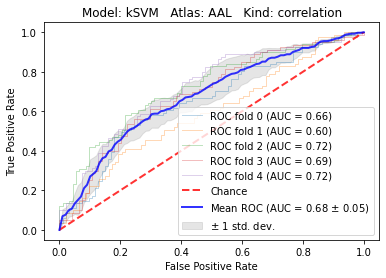

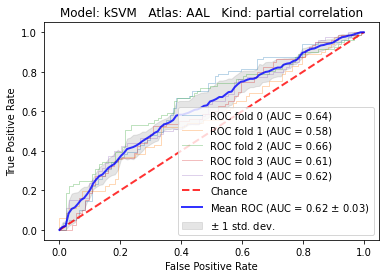

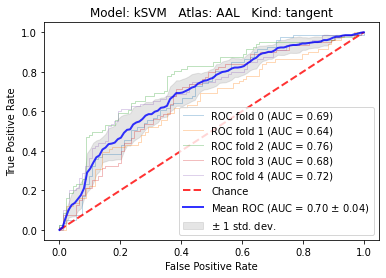

In [20]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ksvm_corr, X_ksvm_corr, y_aal, skf, atlas, correlation, ksvm)
plotROC(ksvm_part, X_ksvm_part, y_aal, skf, atlas, partial, ksvm)
plotROC(ksvm_tang, X_ksvm_tang, y_aal, skf, atlas, tangent, ksvm)

=========================================================
# Random Forest
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [21]:
# Correlation
from crossvalidation import CrossValidation

[X_rf_corr, rf_corr_scores] = CrossValidation(rf_corr, correlation, y_aal, skf, abide_aal.rois_aal)
[X_rf_part, rf_part_scores] = CrossValidation(rf_part, partial,     y_aal, skf, abide_aal.rois_aal)
[X_rf_tang, rf_tang_scores] = CrossValidation(rf_tang, tangent,     y_aal, skf, abide_aal.rois_aal)


In [22]:
from scores import getScores
[rf_corr_acc, rf_corr_sen, rf_corr_spe] = getScores(rf_corr_scores)
[rf_part_acc, rf_part_sen, rf_part_spe] = getScores(rf_part_scores)
[rf_tant_acc, rf_tang_sen, rf_tang_spe] = getScores(rf_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

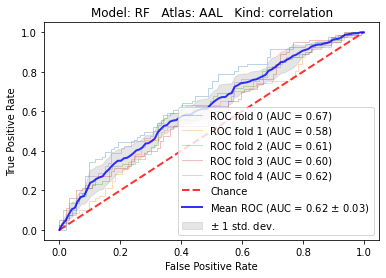

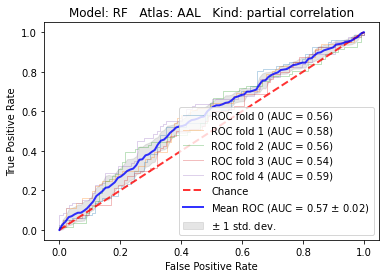

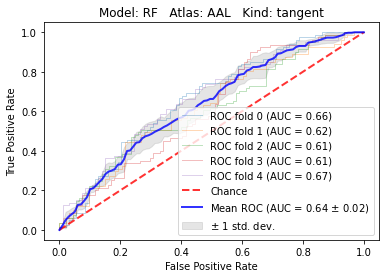

In [23]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(rf_corr, X_rf_corr, y_aal, skf, atlas, correlation, rf)
plotROC(rf_part, X_rf_part, y_aal, skf, atlas, partial, rf)
plotROC(rf_tang, X_rf_tang, y_aal, skf, atlas, tangent, rf)

=========================================================
# Ada Boost
=========================================================

#### Kind = Correlation, Partial Correlation, Tangent
===========================================================================================================

In [24]:
# Correlation
from crossvalidation import CrossValidation

[X_ab_corr, ab_corr_scores] = CrossValidation(ab_corr, correlation, y_aal, skf, abide_aal.rois_aal)
[X_ab_part, ab_part_scores] = CrossValidation(ab_part, partial,     y_aal, skf, abide_aal.rois_aal)
[X_ab_tang, ab_tang_scores] = CrossValidation(ab_tang, tangent,     y_aal, skf, abide_aal.rois_aal)


In [25]:
from scores import getScores
[ab_corr_acc, ab_corr_sen, ab_corr_spe] = getScores(ab_corr_scores)
[ab_part_acc, ab_part_sen, ab_part_spe] = getScores(ab_part_scores)
[ab_tant_acc, ab_tang_sen, ab_tang_spe] = getScores(ab_tang_scores)

##### Receiver Operating Characteristic (ROC) with cross validation
======================================================================================================

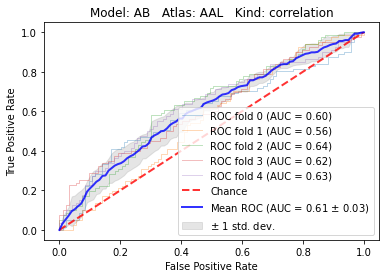

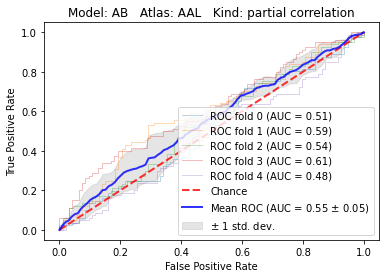

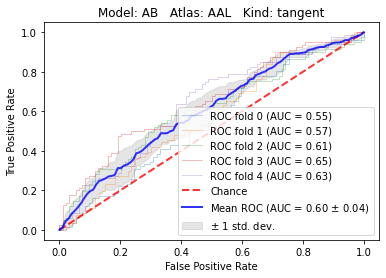

In [26]:
from roc import plotROC

import matplotlib.pylab as pl

plotROC(ab_corr, X_ab_corr, y_aal, skf, atlas, correlation, ab)
plotROC(ab_part, X_ab_part, y_aal, skf, atlas, partial, ab)
plotROC(ab_tang, X_ab_tang, y_aal, skf, atlas, tangent, ab)

# Summary Results

In [27]:
from IPython.display import HTML, display

test=[["","","Correlation"," "," ","Parital Corr",""," ","Tangent",""],
      
      ["Classifier","Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy",\
       "Sensitivity","Specificity", "Accuracy"],
      
      ["LR",lr_corr_sen,lr_corr_spe,lr_corr_acc,\
       lr_part_sen,lr_part_spe,lr_part_acc,\
       lr_tang_sen,lr_tang_spe,lr_tant_acc
      ],
      
      ["lSVM",lsvm_corr_sen,lsvm_corr_spe,lsvm_corr_acc,\
       lsvm_part_sen,lsvm_part_spe,lsvm_part_acc,\
       lsvm_tang_sen,lsvm_tang_spe,lsvm_tant_acc
      ],
      
      ["kSVM",ksvm_corr_sen,ksvm_corr_spe,ksvm_corr_acc,\
       ksvm_part_sen,ksvm_part_spe,ksvm_part_acc,\
       ksvm_tang_sen,ksvm_tang_spe,ksvm_tant_acc
      ],
      
      ["RF",rf_corr_sen,rf_corr_spe,rf_corr_acc,\
       rf_part_sen,rf_part_spe,rf_part_acc,\
       rf_tang_sen,rf_tang_spe,rf_tant_acc
      ], 
      
      ["AB",ab_corr_sen,ab_corr_spe,ab_corr_acc,\
       ab_part_sen,ab_part_spe,ab_part_acc,\
       ab_tang_sen,ab_tang_spe,ab_tant_acc
      ]
     ]

print("Test:")
print("===========================================================================================")
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in test))
))

Test:


,,Correlation,,,Parital Corr,,,Tangent,
Classifier,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy,Sensitivity,Specificity,Accuracy
LR,53.86%,75.42%,65.44%,50.11%,71.37%,61.54%,58.07%,71.37%,65.22%
lSVM,55.60%,73.49%,65.21%,52.59%,67.30%,60.50%,42.43%,80.78%,63.04%
kSVM,58.81%,68.15%,63.84%,54.32%,64.96%,60.05%,58.07%,71.37%,65.22%
RF,41.18%,73.70%,58.67%,27.56%,78.86%,55.11%,30.03%,82.90%,58.44%
AB,56.08%,62.18%,59.36%,48.14%,59.83%,54.43%,51.88%,61.76%,57.18%
